In [35]:
import DataSetQuery
import AsyncDataSetQuery
import datetime
import MalardHelpers
import json

from datetime import datetime

environmentName = 'DEVv2'
#Sets the URL of the Malard ServiceGateway.
query = DataSetQuery.DataSetQuery('http://localhost:9000',environmentName)
queryAsync = AsyncDataSetQuery.AsyncDataSetQuery('ws://localhost:9000',environmentName)

#print(query.getEnvironment(environmentName))

#determines the databases that store multiple datasets 
print(query.getParentDataSets())
#retrieve the data sets for a given parent
print(query.getDataSets('cryotempo'))
#The overall data cube for the two datasets

parentDs = 'cryotempo'
dataSet = 'GRIS_BaseC_Q2'
region='greenland'

bbox = json.loads(query.getDataSetBoundingBox( parentDs,dataSet,region ))
print(bbox)

#Setup the bounding box
minX=bbox['gridCellMinX']
maxX=bbox['gridCellMaxX']
minY=bbox['gridCellMinY']
maxY=bbox['gridCellMaxY']
minT=datetime.fromtimestamp( bbox['minTime'] )
maxT=datetime.fromtimestamp( bbox['maxTime'] )


#Queries the catalogue and returns the gridcells grouped by x and y with the min and max times.
#gcsOib = query.getGridCells(  parentDs,dataSet,region,minX,maxX,minY,maxY,minT,maxT )
#gcsSwath = query.getGridCells(  parentDs,'GRIS_BaseC_Q2',region,minX,maxX,minY,maxY,minT,maxT )








[{"name":"cryotempo"},{"name":"jatest"},{"name":"mtngla"},{"name":"mtnglauat"},{"name":"test"},{"name":"test_ja"}]
[{"name":"AIS_BaselineC_FilteredPC","region":"antarctic"},{"name":"oib","region":"antarctic"},{"name":"oib","region":"greenland"},{"name":"GRIS_BaseC_Q2","region":"greenland"}]
{'gridCellMinX': -700000, 'gridCellMaxX': 900000, 'gridCellMinY': -3400000, 'gridCellMaxY': -600000, 'minTime': 1296537366, 'maxTime': 1467303342, 'totalPoints': 4986781805, 'numberOfShards': 11289}


[{"gridCellMinX":500000,"gridCellMaxX":600000,"gridCellMinY":-600000,"gridCellMaxY":-500000,"minTime":1301319948,"maxTime":1301320724,"totalPoints":13199,"numberOfShards":1},{"gridCellMinX":400000,"gridCellMaxX":500000,"gridCellMinY":-400000,"gridCellMaxY":-300000,"minTime":1301318784,"maxTime":1301318784,"totalPoints":5218,"numberOfShards":1},{"gridCellMinX":400000,"gridCellMaxX":500000,"gridCellMinY":-500000,"gridCellMaxY":-400000,"minTime":1301318784,"maxTime":1301319560,"totalPoints":7517,"numberOfShards":1},{"gridCellMinX":400000,"gridCellMaxX":500000,"gridCellMinY":-800000,"gridCellMaxY":-700000,"minTime":1301322665,"maxTime":1301323441,"totalPoints":13396,"numberOfShards":1},{"gridCellMinX":300000,"gridCellMaxX":400000,"gridCellMinY":-300000,"gridCellMaxY":-200000,"minTime":1301317231,"maxTime":1301317620,"totalPoints":10461,"numberOfShards":1},{"gridCellMinX":300000,"gridCellMaxX":400000,"gridCellMinY":-400000,"gridCellMaxY":-300000,"minTime":1301317231,"maxTime":1301317231,"to

In [3]:
# loads the json output of the getGridCells call and creates a flattened DataFrame.
from pandas.io.json import json_normalize
import json
import pandas as pd

oibdata = json.loads(gcsOib)
dfOib = json_normalize(oibdata)
print(len(dfOib))
swathdata = json.loads(gcsSwath)
dfSwath = json_normalize(swathdata)

print(len(dfSwath))

joined = pd.merge(dfOib, dfSwath, on=['gridCellMinX','gridCellMinY'], how='inner')


print(joined[joined['totalPoints_x'] > 90000])

155
218
    gridCellMaxX_x  gridCellMaxY_x  gridCellMinX  gridCellMinY   maxTime_x  \
11         -500000        -1300000       -600000      -1400000  1301567315   

     minTime_x  numberOfShards_x  totalPoints_x  gridCellMaxX_y  \
11  1300300423                 1          92952         -500000   

    gridCellMaxY_y   maxTime_y   minTime_y  numberOfShards_y  totalPoints_y  
11        -1300000  1301502296  1299001794                 3        1411025  


In [5]:
minX = -500000
maxX = minX + 100000
minY = -1300000
maxY = minY + 100000 

#No filters
oib = queryAsync.executeQuery(  'cryotempo','oib','greenland',minX,maxX,minY,maxY,minT,maxT,[],[])
#Converts the NetCDF into a DataFrame.
dfOib = MalardHelpers.getDataFrameFromNetCDF(oib.resultFileName)

print(oib.resultFileName)

#No filters
swath = queryAsync.executeQuery(  'cryotempo','GRIS_BaseC_Q2','greenland',minX,maxX,minY,maxY,minT,maxT,[],[])
#Converts the NetCDF into a DataFrame.
dfSwath = MalardHelpers.getDataFrameFromNetCDF(swath.resultFileName)

print(swath.resultFileName)


/data/puma1/scratch/v2/malard/export/cryotempo_oib_975171745.nc
/data/puma1/scratch/v2/malard/export/cryotempo_GRIS_BaseC_Q2_975171745.nc


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt


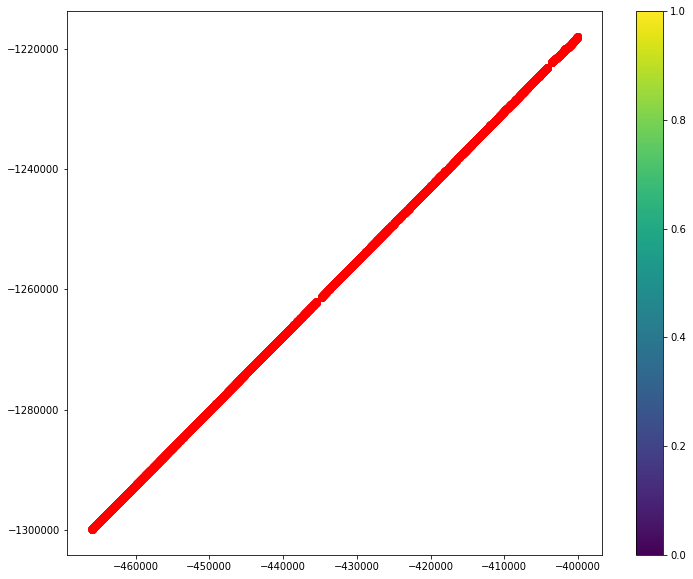

In [7]:
## plot with no filters
plt.figure(figsize=(12,10))
plt.scatter(x=dfOib['x'], y=dfOib['y'], c='red')
#plt.scatter(x=dfSwath['x'], y=dfSwath['y'], c=dfSwath['elev'], marker='.', s=20, vmax=7500)
plt.colorbar()
plt.show()

In [ ]:
## plot with filters
plt.figure(figsize=(12,10))
#vmin and vmax set min and max of colour bar
plt.scatter(x=withFilter['x'], y=withFilter['y'], c=withFilter['elev'], marker='.', s=20, vmax=dfNoFilter['elev'].max(), vmin=dfNoFilter['elev'].min())
plt.colorbar()
plt.show()

In [ ]:

#swathDetails - information about the source swath data and how the DataSetLoader did the gridding.
results = query.getSwathDetails('mtngla','tdx','himalayas')

print(results)


In [ ]:
swathById = query.getSwathDetailsFromId('mtngla','tandemx','himalayas',1)

print(swathById)
 
swathByName = query.getSwathDetailsFromName('mtngla','tdx','himalayas','CS_LTA__SIR_SIN_2S_20100716T075344_20100716T075554_C001.nc')

print(swathByName)


In [ ]:
#swathDetails - get all the swaths for a particular data set.
import pandas as pd
import MalardHelpers as m

df = m.getSwathDetailsAsDataFrame('mtngla','tdx','himalayas',query)

print(df[0:1])


In [ ]:
import json
swathDetails = json_normalize(json.loads(query.getSwathDetails('mtngla','tdx','himalayas')))

print(len(swathDetails['swathName']))


In [8]:
sourcePath = '/data/snail1/scratch/test/'#put your input path in here
fileName = 'testmask.shp'#put your test file in here
parentDsName = 'test_ja'
dataSet = 'RS6'
maskType = 'Glacier' 
region = 'HMA' 
minX = 500000 
minY = 0 
size = 100000 

query.publishMask(sourcePath, fileName, parentDsName, dataSet, maskType, region, minX, minY, size )

'Published: /data/puma1/scratch/v2/malard/mask/test_ja/static/RS6/Glacier/HMA/cell_x500000_y0_s100000/testmask.shp'

In [9]:
print(query.getMasks('test_ja'))

[{"dataSet":"RS6","type":"Glacier","region":"HMA"}]


In [ ]:
parentdataset = 'mtngla'
dataSet = 'RGIv60'
maskType = 'Glacier'
region = 'HMA'

print(query.getGridCellMasks(parentdataset, dataSet, maskType, region))

In [ ]:
#gets the mask for a gridcell.

print(query.getGridCellMask(parentdataset, dataSet, maskType, region,minX,minY,size))

In [ ]:
parentDsName = 'test'
runName = 'gctest_2'
minX = 0.0
minY = 200000.0
size = 100000.0

#expects a dictionary of string to double.
statistics = {'NumberOfPoints':1000,'MaskedPoints':500}

query.publishGridCellStats( parentDsName, runName, minX, minY, size, statistics )

In [ ]:
#get the available run statistics
parentDsName = 'mtngla'
query.getAvailableRunStatistics( parentDsName )

In [ ]:
#get the statistics for a gridcell.
query.getGridCellStatistics(parentDsName, runName, minX, minY, size)

In [ ]:
query.getRunStatistics(parentDsName,"TestRun")

In [ ]:
#Get the proj4 for code for the given shortCode.
print( query.getProjection('HMA'))

In [17]:
#Publish points for a grid cell.
parentDataSet = 'mtngla' #intended usage mtngla
dataSet = 'tdxtest1'
region = 'himalayas'
projection = 'HMA'
sourceFileName = '/data/snail1/scratch/tandemx/swath/y2017/m6/cell_HMA_0_600000/GridCell_0.nc'
minX = 0
minY = 600000
minT = datetime.datetime(2017,6,1).timestamp()
size = 100000

queryAsync.publishGridCellPoints(parentDataSet, dataSet,region, minX, minY,minT, size, sourceFileName, projection)
